# Analysing and Predicting Closing Stock Price

Using different regression models to predict the closing stock price of Reliance using the given data and then concluding which model gives the best result.


## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [3]:
df = pd.read_csv('RELIANCE.NS.csv')
df.drop(['Volume','Adj Close'],axis=1,inplace=True)

In [4]:
df

,Date,Open,High,Low,Close
0,2018-10-08,1094.574585,1118.398682,1091.553223,1115.971680
1,2018-10-15,1119.290283,1168.275879,1060.200317,1090.958740
2,2018-10-22,1099.577148,1104.332031,1006.856018,1035.088379
3,2018-10-29,1036.178101,1083.578735,1036.178101,1064.806641
4,2018-11-05,1063.370361,1104.530151,1054.999634,1083.182495
...,...,...,...,...,...
257,2023-09-11,2452.000000,2483.000000,2426.250000,2457.850098
258,2023-09-18,2440.050049,2451.000000,2350.000000,2354.949951
259,2023-09-25,2350.399902,2383.000000,2325.000000,2345.000000
260,2023-10-02,2345.000000,2345.000000,2295.100098,2318.000000


In [5]:
X = df.iloc[:,1:-1].values
X

array([[1094.574585, 1118.398682, 1091.553223],
       [1119.290283, 1168.275879, 1060.200317],
       [1099.577148, 1104.332031, 1006.856018],
       [1036.178101, 1083.578735, 1036.178101],
       [1063.370361, 1104.530151, 1054.999634],
       [1087.392578, 1119.339722, 1060.002197],
       [1122.262085, 1145.046143, 1089.77002 ],
       [1098.586548, 1174.863525, 1087.095459],
       [1163.867676, 1163.867676, 1097.942627],
       [1099.577148, 1117.408081, 1045.093506],
       [1105.471191, 1136.526855, 1085.708618],
       [1090.5625  , 1124.589966, 1055.643555],
       [1120.330444, 1123.203125, 1070.948486],
       [1096.605225, 1107.947754, 1078.378052],
       [1084.718018, 1178.726807, 1076.19873 ],
       [1182.78833 , 1252.824463, 1177.488525],
       [1238.757813, 1244.156616, 1179.915527],
       [1235.290649, 1308.793945, 1230.387207],
       [1263.919312, 1264.018311, 1202.600586],
       [1238.262451, 1245.989258, 1199.826782],
       [1224.393921, 1233.210449, 1194.6

In [6]:
y = df.iloc[:,-1].values
y

array([1115.97168 , 1090.95874 , 1035.088379, 1064.806641, 1083.182495,
       1116.813721, 1092.494263, 1156.58667 , 1123.153687, 1101.75647 ,
       1089.869141, 1114.981079, 1088.33374 , 1087.739258, 1173.229004,
       1234.300049, 1238.213013, 1265.702393, 1232.764648, 1220.778198,
       1214.537354, 1255.201904, 1309.239746, 1329.151001, 1350.449097,
       1341.18689 , 1330.488281, 1372.935913, 1379.721558, 1395.62085 ,
       1239.401733, 1255.499146, 1324.296997, 1317.659912, 1302.553101,
       1305.178223, 1267.485474, 1241.333374, 1251.487183, 1268.476074,
       1237.271851, 1202.402466, 1173.229004, 1151.187866, 1265.999634,
       1263.869751, 1236.826172, 1211.020752, 1214.091675, 1242.571655,
       1296.758057, 1295.816895, 1339.899048, 1403.050537, 1420.782349,
       1443.219727, 1431.926758, 1457.038696, 1531.978394, 1536.584717,
       1540.299561, 1568.036621, 1584.084473, 1527.86731 , 1522.716187,
       1533.117554, 1566.154419, 1507.262695, 1370.360352, 1420.

X is the features dataset, containing the variables that act as features while y is the column we have to predict i.e the closing price. 

## Splitting the Data into Training and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train

array([[1151.187866, 1292.201172, 1151.187866],
       [1545.450684, 1562.736816, 1495.969727],
       [1475.018311, 1493.839844, 1443.714966],
       [2631.5     , 2656.699951, 2540.100098],
       [2570.550049, 2629.699951, 2491.      ],
       [2600.      , 2602.199951, 2450.050049],
       [2473.5     , 2474.100098, 2320.      ],
       [1996.400024, 2085.      , 1895.      ],
       [2533.      , 2802.      , 2521.800049],
       [1182.78833 , 1252.824463, 1177.488525],
       [2278.699951, 2411.      , 2180.      ],
       [2159.100098, 2165.      , 2089.25    ],
       [1263.919312, 1264.018311, 1202.600586],
       [2110.199951, 2219.899902, 2062.5     ],
       [2630.75    , 2642.      , 2571.100098],
       [2375.      , 2423.899902, 2348.      ],
       [2105.      , 2154.      , 2070.100098],
       [2434.449951, 2644.399902, 2416.649902],
       [2688.899902, 2802.      , 2675.      ],
       [2149.350098, 2203.      , 2128.149902],
       [1324.544678, 1329.398682, 1291.9

## Training the Data using Multiple Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [85]:
new_data = [[1800,1850,1790]]
predictions_lin = lin_regressor.predict(new_data)

In [86]:
print(predictions_lin)

[1833.67]


## Predecting the Results for Linear Regression

In [43]:
y_pred = lin_regressor.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

[[2456.99]
 [2393.05]
 [2112.96]
 [1115.78]
 [1961.03]
 [2502.84]
 [2640.14]
 [2424.89]
 [2392.22]
 [2294.76]
 [2196.87]
 [1883.92]
 [2327.75]
 [2051.08]
 [2581.68]
 [2479.23]
 [1242.87]
 [1267.78]
 [2650.41]
 [1883.3 ]
 [1469.36]
 [2599.49]
 [1159.78]
 [2451.32]
 [2601.86]
 [2071.41]
 [1272.59]
 [2439.19]
 [2477.01]
 [1477.61]
 [1501.97]
 [1083.62]
 [2343.47]
 [1997.46]
 [2475.29]
 [2331.56]
 [2419.44]
 [1211.84]
 [1000.85]
 [2042.86]
 [1916.92]
 [1097.84]
 [1338.2 ]
 [2588.42]
 [2036.62]
 [1088.08]
 [2010.54]
 [2339.93]
 [1562.8 ]
 [1927.46]
 [2375.26]
 [1757.6 ]
 [2646.03]]


Comparing the y_test and y_pred

In [44]:
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
print(result)

[[2456.99 2408.7 ]
 [2393.05 2390.55]
 [2112.96 2105.7 ]
 [1115.78 1123.15]
 [1961.03 1929.8 ]
 [2502.84 2467.6 ]
 [2640.14 2613.85]
 [2424.89 2426.6 ]
 [2392.22 2368.15]
 [2294.76 2283.95]
 [2196.87 2213.15]
 [1883.92 2029.15]
 [2327.75 2345.05]
 [2051.08 2041.6 ]
 [2581.68 2595.85]
 [2479.23 2482.7 ]
 [1242.87 1263.87]
 [1267.78 1259.07]
 [2650.41 2655.85]
 [1883.3  1911.7 ]
 [1469.36 1443.22]
 [2599.49 2631.8 ]
 [1159.78 1156.59]
 [2451.32 2457.85]
 [2601.86 2565.6 ]
 [2071.41 2085.8 ]
 [1272.59 1241.33]
 [2439.19 2441.95]
 [2477.01 2506.5 ]
 [1477.61 1459.4 ]
 [1501.97 1522.72]
 [1083.62 1055.59]
 [2343.47 2329.  ]
 [1997.46 2002.55]
 [2475.29 2439.5 ]
 [2331.56 2385.4 ]
 [2419.44 2401.8 ]
 [1211.84 1214.54]
 [1000.85 1094.92]
 [2042.86 2035.3 ]
 [1916.92 1937.3 ]
 [1097.84 1116.81]
 [1338.2  1309.24]
 [2588.42 2615.65]
 [2036.62 2021.85]
 [1088.08 1088.33]
 [2010.54 2054.5 ]
 [2339.93 2336.65]
 [1562.8  1536.58]
 [1927.46 1931.75]
 [2375.26 2331.3 ]
 [1757.6  1787.9 ]
 [2646.03 26

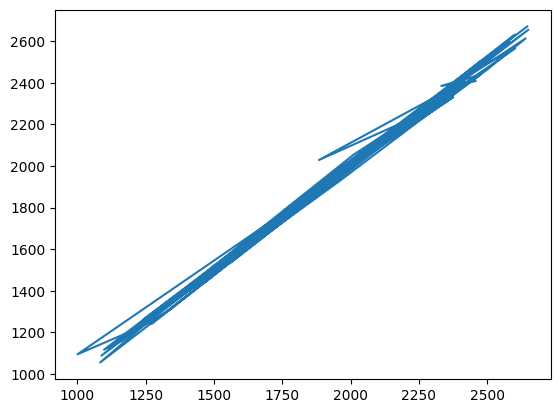

In [45]:
plt.plot(y_pred,y_test)

## Evaluating the performance of the Model

In [46]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [47]:
print(score*100)

99.58978046085123


## Training Random Forest Regression Model on the Dataset

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr_regressor = RandomForestRegressor(n_estimators=10,random_state=0)
rfr_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [83]:
new_data = [[1800,1850,1790]]
predictions_rfr = rfr_regressor.predict(new_data)

In [84]:
print(predictions_rfr)

[1837.13]


## Predicting the Results for Random Forest Regression

In [49]:
y_pred = rfr_regressor.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

[[2521.59]
 [2407.16]
 [2126.09]
 [1132.26]
 [1963.34]
 [2525.91]
 [2604.52]
 [2518.2 ]
 [2399.22]
 [2368.32]
 [2206.79]
 [1878.14]
 [2319.64]
 [1988.34]
 [2533.35]
 [2439.44]
 [1242.08]
 [1260.94]
 [2611.2 ]
 [1883.67]
 [1458.27]
 [2608.8 ]
 [1162.95]
 [2408.12]
 [2610.36]
 [2092.36]
 [1262.79]
 [2408.55]
 [2483.83]
 [1551.63]
 [1524.38]
 [1050.68]
 [2351.77]
 [1990.31]
 [2516.23]
 [2357.96]
 [2404.23]
 [1212.67]
 [1204.7 ]
 [2074.73]
 [1942.52]
 [1109.37]
 [1280.61]
 [2594.54]
 [2000.56]
 [1094.81]
 [2058.02]
 [2329.69]
 [1584.71]
 [1943.35]
 [2365.67]
 [1757.07]
 [2624.58]]


In [50]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2521.59 2408.7 ]
 [2407.16 2390.55]
 [2126.09 2105.7 ]
 [1132.26 1123.15]
 [1963.34 1929.8 ]
 [2525.91 2467.6 ]
 [2604.52 2613.85]
 [2518.2  2426.6 ]
 [2399.22 2368.15]
 [2368.32 2283.95]
 [2206.79 2213.15]
 [1878.14 2029.15]
 [2319.64 2345.05]
 [1988.34 2041.6 ]
 [2533.35 2595.85]
 [2439.44 2482.7 ]
 [1242.08 1263.87]
 [1260.94 1259.07]
 [2611.2  2655.85]
 [1883.67 1911.7 ]
 [1458.27 1443.22]
 [2608.8  2631.8 ]
 [1162.95 1156.59]
 [2408.12 2457.85]
 [2610.36 2565.6 ]
 [2092.36 2085.8 ]
 [1262.79 1241.33]
 [2408.55 2441.95]
 [2483.83 2506.5 ]
 [1551.63 1459.4 ]
 [1524.38 1522.72]
 [1050.68 1055.59]
 [2351.77 2329.  ]
 [1990.31 2002.55]
 [2516.23 2439.5 ]
 [2357.96 2385.4 ]
 [2404.23 2401.8 ]
 [1212.67 1214.54]
 [1204.7  1094.92]
 [2074.73 2035.3 ]
 [1942.52 1937.3 ]
 [1109.37 1116.81]
 [1280.61 1309.24]
 [2594.54 2615.65]
 [2000.56 2021.85]
 [1094.81 1088.33]
 [2058.02 2054.5 ]
 [2329.69 2336.65]
 [1584.71 1536.58]
 [1943.35 1931.75]
 [2365.67 2331.3 ]
 [1757.07 1787.9 ]
 [2624.58 26

## Evaluating the performance of the Random Forest Regression Model

In [51]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred) 

In [52]:
print(score*100)

99.18896787534159


## Training Decision Tree Regression Model on the Dataset

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr_regressor = DecisionTreeRegressor()
dtr_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [81]:
new_data = [[1800,1850,1790]]
predictions_dtr = dtr_regressor.predict(new_data)

In [82]:
print(predictions_dtr)

[1878.05]


## Predicting using the Decision Tree regression Model

In [54]:
dtr_regressor.predict(X_test)

array([2624.45, 2391.4 , 2129.05, 1151.19, 1946.75, 2624.45, 2597.65,
       2473.3 , 2420.5 , 2412.6 , 2225.65, 1841.95, 2318.  , 2005.8 ,
       2593.1 , 2391.4 , 1237.27, 1296.76, 2618.  , 1841.95, 1457.04,
       2617.6 , 1173.23, 2442.65, 2617.6 , 2146.45, 1296.76, 2442.65,
       2484.35, 1540.3 , 1527.87, 1067.33, 2376.4 , 2005.8 , 2526.15,
       2376.4 , 2432.35, 1214.09, 1211.02, 2112.4 , 1937.45, 1114.98,
       1267.49, 2590.  , 1987.5 , 1089.87, 1994.65, 2305.7 , 1568.04,
       1932.1 , 2377.75, 1741.65, 2618.  ])

In [55]:
## Evaluating the performance
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

In [56]:
print(result)

[[2521.59 2408.7 ]
 [2407.16 2390.55]
 [2126.09 2105.7 ]
 [1132.26 1123.15]
 [1963.34 1929.8 ]
 [2525.91 2467.6 ]
 [2604.52 2613.85]
 [2518.2  2426.6 ]
 [2399.22 2368.15]
 [2368.32 2283.95]
 [2206.79 2213.15]
 [1878.14 2029.15]
 [2319.64 2345.05]
 [1988.34 2041.6 ]
 [2533.35 2595.85]
 [2439.44 2482.7 ]
 [1242.08 1263.87]
 [1260.94 1259.07]
 [2611.2  2655.85]
 [1883.67 1911.7 ]
 [1458.27 1443.22]
 [2608.8  2631.8 ]
 [1162.95 1156.59]
 [2408.12 2457.85]
 [2610.36 2565.6 ]
 [2092.36 2085.8 ]
 [1262.79 1241.33]
 [2408.55 2441.95]
 [2483.83 2506.5 ]
 [1551.63 1459.4 ]
 [1524.38 1522.72]
 [1050.68 1055.59]
 [2351.77 2329.  ]
 [1990.31 2002.55]
 [2516.23 2439.5 ]
 [2357.96 2385.4 ]
 [2404.23 2401.8 ]
 [1212.67 1214.54]
 [1204.7  1094.92]
 [2074.73 2035.3 ]
 [1942.52 1937.3 ]
 [1109.37 1116.81]
 [1280.61 1309.24]
 [2594.54 2615.65]
 [2000.56 2021.85]
 [1094.81 1088.33]
 [2058.02 2054.5 ]
 [2329.69 2336.65]
 [1584.71 1536.58]
 [1943.35 1931.75]
 [2365.67 2331.3 ]
 [1757.07 1787.9 ]
 [2624.58 26

## Evaluating the performance of the Decision Tree Regression Model

In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [58]:
print(score*100)

99.18896787534159


## Training the Dataset using Polynomial Regression Model

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train) # defining a polynomial regression instance
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly,y_train)

LinearRegression()

In [79]:
new_data = [[1800,1850,1790]]
predictions_poly = poly_regressor.predict(poly_reg.transform(new_data))


In [80]:
print(predictions_poly)

[1830.18]


## Predicting the Test set results

In [60]:
y_pred = poly_regressor.predict(poly_reg.transform(X_test))

In [61]:
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

In [62]:
print(result)

[[2458.76 2408.7 ]
 [2391.83 2390.55]
 [2109.37 2105.7 ]
 [1133.26 1123.15]
 [1963.68 1929.8 ]
 [2490.71 2467.6 ]
 [2667.27 2613.85]
 [2387.45 2426.6 ]
 [2390.71 2368.15]
 [2303.37 2283.95]
 [2197.69 2213.15]
 [1857.15 2029.15]
 [2324.7  2345.05]
 [2035.25 2041.6 ]
 [2556.6  2595.85]
 [2449.68 2482.7 ]
 [1245.86 1263.87]
 [1253.65 1259.07]
 [2658.01 2655.85]
 [1832.26 1911.7 ]
 [1456.89 1443.22]
 [2620.47 2631.8 ]
 [1150.05 1156.59]
 [2465.83 2457.85]
 [2617.65 2565.6 ]
 [2053.59 2085.8 ]
 [1274.08 1241.33]
 [2441.6  2441.95]
 [2476.81 2506.5 ]
 [1387.81 1459.4 ]
 [1518.15 1522.72]
 [1360.92 1055.59]
 [2345.18 2329.  ]
 [1986.82 2002.55]
 [2470.7  2439.5 ]
 [2336.11 2385.4 ]
 [2408.98 2401.8 ]
 [1218.89 1214.54]
 [-290.99 1094.92]
 [2041.79 2035.3 ]
 [1925.63 1937.3 ]
 [1095.5  1116.81]
 [1320.62 1309.24]
 [2568.73 2615.65]
 [2020.39 2021.85]
 [1100.46 1088.33]
 [2027.69 2054.5 ]
 [2340.28 2336.65]
 [1556.29 1536.58]
 [1932.08 1931.75]
 [2377.11 2331.3 ]
 [1755.57 1787.9 ]
 [2639.52 26

## Evaluating the performance of the Polynomial Regression Model

In [63]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [64]:
print(score*100)

85.34586097135997


Analysing the accuracies of the Model

#### Analysing the accuracies of various Models:

In [65]:
acc_df = pd.read_csv('accuracies.csv')

In [66]:
acc_df
X = acc_df.iloc[:,0].values

In [67]:
X

array(['Multiple Linear Regression', 'Decision Tree Regression',
       'Random Forest Regression', 'Polynomial Regression'], dtype=object)

In [68]:
y = acc_df.iloc[:,1].values

In [69]:
y

array([99.58, 99.18, 99.18, 85.34])

Text(0, 0.5, 'Percentage Accuracy')

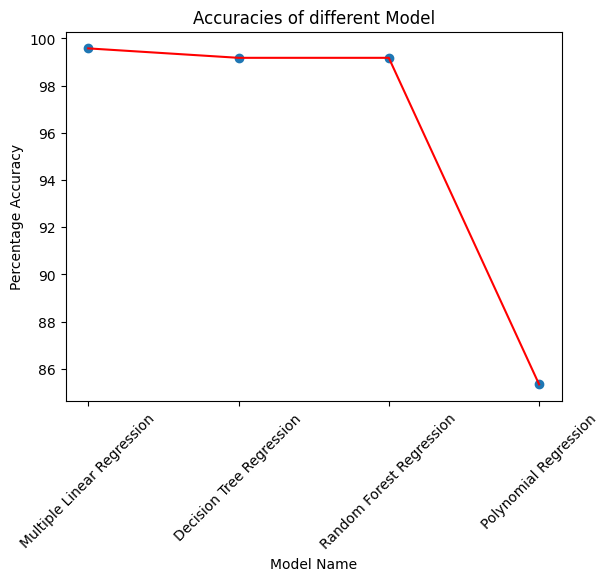

In [70]:
plt.scatter(X,y)
plt.plot(X,y,color='red')
plt.title('Accuracies of different Model')
plt.xlabel('Model Name')
plt.xticks(rotation=45)
plt.ylabel('Percentage Accuracy')

In conclusion, Multiple Linear Regression Model gives the best prediction accuracy for the given dataset. It takes into account the 3 columns provided and then predicts the closing price for the stock. 

## Comparing the predictions using different models

In [88]:
pred_df = pd.read_csv('predictions.csv')
X = pred_df.iloc[:,0].values
y = pred_df.iloc[:,1].values

Text(0, 0.5, 'Prediction (Closing Stock price)')

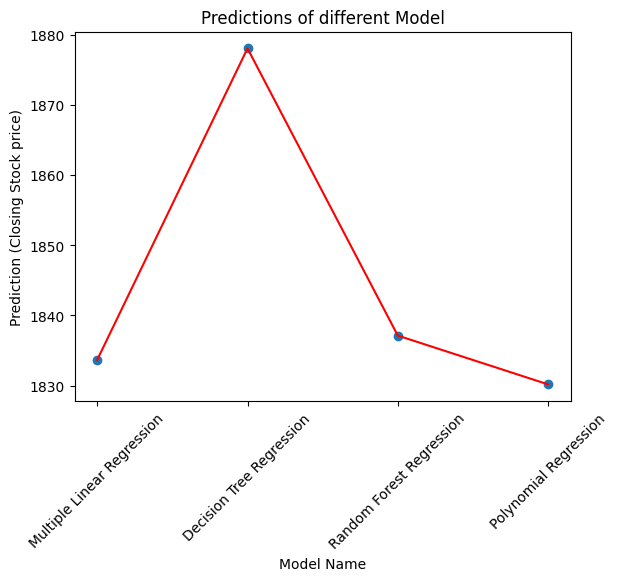

In [89]:
plt.scatter(X,y)
plt.plot(X,y,color='red')
plt.title('Predictions of different Model')
plt.xlabel('Model Name')
plt.xticks(rotation=45)
plt.ylabel('Prediction (Closing Stock price)')